In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
with open('answers.csv') as f:
    results = pd.read_csv(f)

results

,participant,ID_participant,ID_sentence,transitivity,result_order,result_focus,Unnamed: 6,Unnamed: 7
0,Паша Архипов,PArh,1_1,INTR,VS,S,NaN,NaN
1,Паша Архипов,PArh,1_2,INTR,SV,V,NaN,NaN
2,Паша Архипов,PArh,1_3,na,OV,O,NaN,NaN
3,Паша Архипов,PArh,1_4,INTR,SV,S,NaN,NaN
4,Паша Архипов,PArh,1_5,na,SVO,S,NaN,NaN
...,...,...,...,...,...,...,...,...
1345,NaN,EZay,4_2,NaN,SVO,V,NaN,NaN
1346,NaN,EZay,4_3,NaN,SVO,O,NaN,NaN
1347,NaN,EZay,4_4,NaN,SOV,O,NaN,NaN
1348,NaN,EZay,4_5,NaN,SVO,O,NaN,NaN


In [22]:
results = results.drop(['participant', 'transitivity', 'Unnamed: 6', 'Unnamed: 7'], axis=1)


In [23]:
uniq = results['ID_participant'].nunique()
print(uniq)

30


In [24]:
results

,ID_participant,ID_sentence,result_order,result_focus
0,PArh,1_1,VS,S
1,PArh,1_2,SV,V
2,PArh,1_3,OV,O
3,PArh,1_4,SV,S
4,PArh,1_5,SVO,S
...,...,...,...,...
1345,EZay,4_2,SVO,V
1346,EZay,4_3,SVO,O
1347,EZay,4_4,SOV,O
1348,EZay,4_5,SVO,O


In [25]:
with open('only_Q.csv') as f:
    que = pd.read_csv(f)

# que = que.drop()

In [26]:
merged = pd.merge(results, que, on='ID_sentence', how='left')
merged

,ID_participant,ID_sentence,result_order,result_focus,stimulus,transitivity,subject_status,object_status,type,subject_animacy,object_animacy,special things
0,PArh,1_1,VS,S,распустились нарциссы,INTR,new,none,narrative,inanimate,none,NaN
1,PArh,1_2,SV,V,лена показала вове что цветы зацвели,INTR,given,none,narrative,inanimate,none,does Vova know about the flowers?
2,PArh,1_3,OV,O,сейчас расскажу маме,TR,none,new,dialogue,none,animate,filler
3,PArh,1_4,SV,S,мама представляешь цветы зацвели,INTR,new,none,dialogue,inanimate,none,does mother know about the flowers? flowers ma...
4,PArh,1_5,SVO,S,"да, моя соседка тоже видела цветы в парке",TR,new,given?,dialogue,animate,inanimate,contrastive topic
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,EZay,4_2,SVO,V,Вася любит философию,TR,given,new,dialogue,animate,inanimate,explanation of a guess
1346,EZay,4_3,SVO,O,Таня написала стихотворение,TR,new,new,dialogue,animate,inanimate,depends whether interlocutors see the works or...
1347,EZay,4_4,SOV,O,Даша выиграла золото,TR,new,new,dialogue,animate,inanimate,-
1348,EZay,4_5,SVO,O,Вася выиграл серебро,TR,given,new,dialogue,animate,inanimate,contrastive topic


убираю предложения "сейчас расскажу маме", "у него лапы в земле", "кто сломал парту", "бабушка потрепала Петю", "веселый получился праздник" (??),  

## each sentence


In [ ]:

def plot_result_order_percentages(results, sentence_id):
    subset = results[results['ID_sentence'] == sentence_id]
    if subset.empty:
        print(f"No data found for ID_sentence '{sentence_id}'")
        return

    counts = subset['result_order'].value_counts(normalize=True) * 100
    counts = counts.sort_index()

    colors = ['red' if pct < 4 else 'skyblue' for pct in counts]

    stimulus = subset['stimulus'].iloc[0]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(counts.index, counts.values, color=colors, edgecolor='black')
    plt.title(f"ID: {sentence_id} | st: {stimulus[:50]}")
    plt.xlabel("result order")
    plt.ylabel("percentage")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"result_order_dist_{sentence_id}.png")
    # plt.show()

for sentence_id in results['ID_sentence'].unique():
    plot_result_order_percentages(merged, str(sentence_id))



In [29]:
merged = merged[~merged['ID_sentence'].isin(['1_3', '1_12', '2_11', '3_6', '3_11'])]
merged

,ID_participant,ID_sentence,result_order,result_focus,stimulus,transitivity,subject_status,object_status,type,subject_animacy,object_animacy,special things
0,PArh,1_1,VS,S,распустились нарциссы,INTR,new,none,narrative,inanimate,none,NaN
1,PArh,1_2,SV,V,лена показала вове что цветы зацвели,INTR,given,none,narrative,inanimate,none,does Vova know about the flowers?
3,PArh,1_4,SV,S,мама представляешь цветы зацвели,INTR,new,none,dialogue,inanimate,none,does mother know about the flowers? flowers ma...
4,PArh,1_5,SVO,S,"да, моя соседка тоже видела цветы в парке",TR,new,given?,dialogue,animate,inanimate,contrastive topic
5,PArh,1_6,SV,S,"да нет, мои цветы зацвели",INTR,new,none,dialogue,inanimate,none,focus
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,EZay,4_2,SVO,V,Вася любит философию,TR,given,new,dialogue,animate,inanimate,explanation of a guess
1346,EZay,4_3,SVO,O,Таня написала стихотворение,TR,new,new,dialogue,animate,inanimate,depends whether interlocutors see the works or...
1347,EZay,4_4,SOV,O,Даша выиграла золото,TR,new,new,dialogue,animate,inanimate,-
1348,EZay,4_5,SVO,O,Вася выиграл серебро,TR,given,new,dialogue,animate,inanimate,contrastive topic


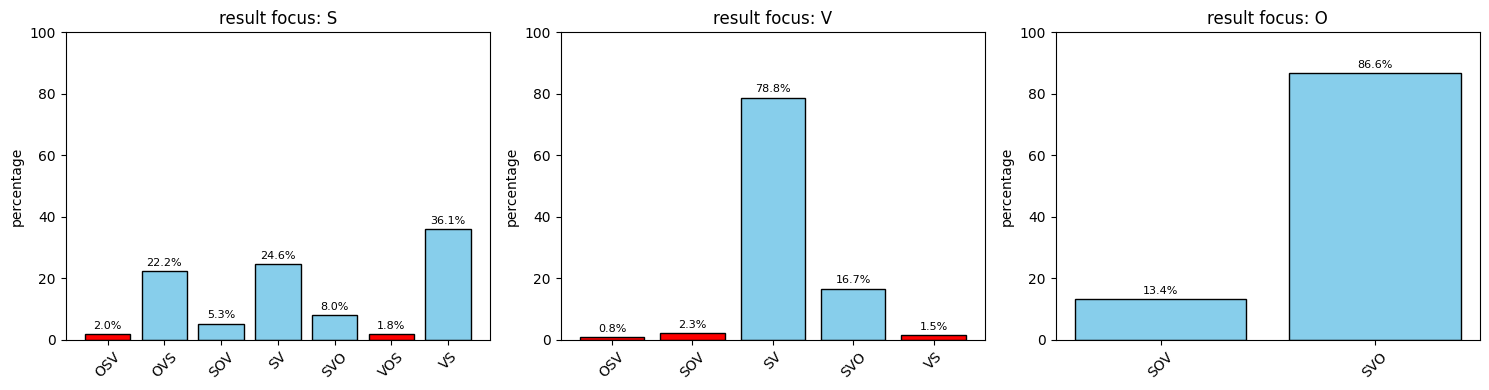

In [30]:
import math
focus_values = merged['result_focus'].dropna().unique()
n = len(focus_values)

cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, focus in enumerate(focus_values):
    ax = axes[i]
    subset = merged[merged['result_focus'] == focus]
    counts = subset['result_order'].value_counts(normalize=True) * 100
    counts = counts.sort_index()

    colors = ['red' if val < 5 else 'skyblue' for val in counts]

    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='black')

    for bar, pct in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f"{pct:.1f}%", ha='center', va='bottom', fontsize=8)

    ax.set_title(f"result focus: {focus}")
    ax.set_ylabel("percentage")
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()